# Model Training

Import of all the necessary data

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, load_model
import os,sys
from pycocotools.coco import COCO
import skimage.io as io

Import and such using TFDS

In [2]:
pip install tensorflow-datasets

##Data Extraction

Extraction of training data

In [3]:
import tensorflow_datasets as tfds

#datasets to use: cifar10,cifar100, sun397 and caltech101; do note that the trining model must be adapted to the dataset
training = tfds.load('cifar10', split='train[:50%]', shuffle_files=True)
assert isinstance(training, tf.data.Dataset)
print(training)


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteVJTOPE/cifar10-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteVJTOPE/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
<_OptionsDataset shapes: {id: (), image: (32, 32, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>


In [5]:
dim = int(32) #image dimensions

training_images = np.empty((len(training),dim, dim, 3), dtype=int)
training_labels = np.empty((len(training),1), dtype=int)

i=0
for example in training:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  
  training_images[i] = example["image"]
  training_labels[i] = example["label"]
  i+=1


Extraction of testing/validation data

In [9]:
validation = tfds.load('cifar10', split='train[-10%:]', shuffle_files=True)
assert isinstance(validation, tf.data.Dataset)
print(validation)


<_OptionsDataset shapes: {id: (), image: (32, 32, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>


In [10]:


testing_images = np.empty((len(validation),dim, dim, 3), dtype=int)
testing_labels = np.empty((len(validation),1), dtype=int)

i=0
for example in validation:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`

  testing_images[i] = example["image"]
  testing_labels[i] = example["label"]
  i+=1


### Model

## Training model


In [11]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(5,5), activation='relu'))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Conv2D(128, (1,1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}") #deviation from the actual value
print(f"Accuracy: {accuracy}") #percentage of testing examples that were classified correctly

model.save('image_classifier.model')


Epoch 1/10
782/782 [==============================] - 54s 69ms/step - loss: 2.4287 - accuracy: 0.2525 - val_loss: 1.5814 - val_accuracy: 0.4168
Epoch 2/10
782/782 [==============================] - 54s 69ms/step - loss: 1.5481 - accuracy: 0.4373 - val_loss: 1.4492 - val_accuracy: 0.4830
Epoch 3/10
782/782 [==============================] - 54s 69ms/step - loss: 1.4075 - accuracy: 0.4945 - val_loss: 1.4301 - val_accuracy: 0.4900
Epoch 4/10
782/782 [==============================] - 54s 69ms/step - loss: 1.3110 - accuracy: 0.5300 - val_loss: 1.4382 - val_accuracy: 0.5036
Epoch 5/10
782/782 [==============================] - 54s 69ms/step - loss: 1.2299 - accuracy: 0.5638 - val_loss: 1.2268 - val_accuracy: 0.5632
Epoch 6/10
782/782 [==============================] - 54s 69ms/step - loss: 1.1432 - accuracy: 0.5958 - val_loss: 1.2777 - val_accuracy: 0.5542
Epoch 7/10
782/782 [==============================] - 54s 69ms/step - loss: 1.1043 - accuracy: 0.6102 - val_loss: 1.2440 - val_accuracy:

INFO:tensorflow:Assets written to: image_classifier.model/assets


##Model execution

Prediction is Plane


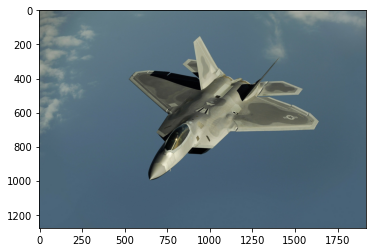

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, load_model
import os,sys
from pycocotools.coco import COCO
import skimage.io as io

def resize(img,dim): #read and resize any image into a 32x32 colour with a RBG colout scheme
  img = cv.imread(img)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB) #convert from cv defult colout scheme to RBG
  plt.imshow(img, cmap= plt.cm.binary)
  height = dim
  width= dim
  img = cv.resize(img, (width, height), interpolation = cv.INTER_AREA) # possible interpolation methods: "interpolation=" INTER_NEAREST,INTER_LINEAR, INTER_AREA, INTER_CUBIC, INTER_LANCZOS4 

  return img
class_names_cifar10 = ['Plane', 'Car', 'Bird', 'Cat','Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

model = models.load_model('image_classifier.model')


img= resize('aircraft.jpg',dim)

prediction = model.predict(np.array([img])) #feed the image into the model
index = np.argmax(prediction)
print(f'Prediction is {class_names_cifar10[index]}')